In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [3]:
data= pd.read_csv('/content/seeds.csv')
data.head()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     209 non-null    float64
 1   Perimeter                209 non-null    float64
 2   Compactness              209 non-null    float64
 3   Length of kernel         209 non-null    float64
 4   Width of kernel          209 non-null    float64
 5   Asymmetry coefficient    209 non-null    float64
 6   Length of kernel groove  209 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [5]:
data.isnull().sum()

Area                       1
Perimeter                  1
Compactness                1
Length of kernel           1
Width of kernel            1
Asymmetry coefficient      1
Length of kernel groove    1
dtype: int64

In [6]:
var_seeds_df=data
var_seeds_df.dropna(inplace=True)

In [7]:
for col in var_seeds_df.columns:
    if var_seeds_df[col].dtype == 'object' and '?' in var_seeds_df[col].unique():
        var_seeds_df = var_seeds_df[var_seeds_df[col] != '?']
    var_seeds_df[col] = pd.to_numeric(var_seeds_df[col], errors='coerce')  # Convert columns to numeric if they were object type


In [8]:
var_seeds_df.dropna(inplace=True)

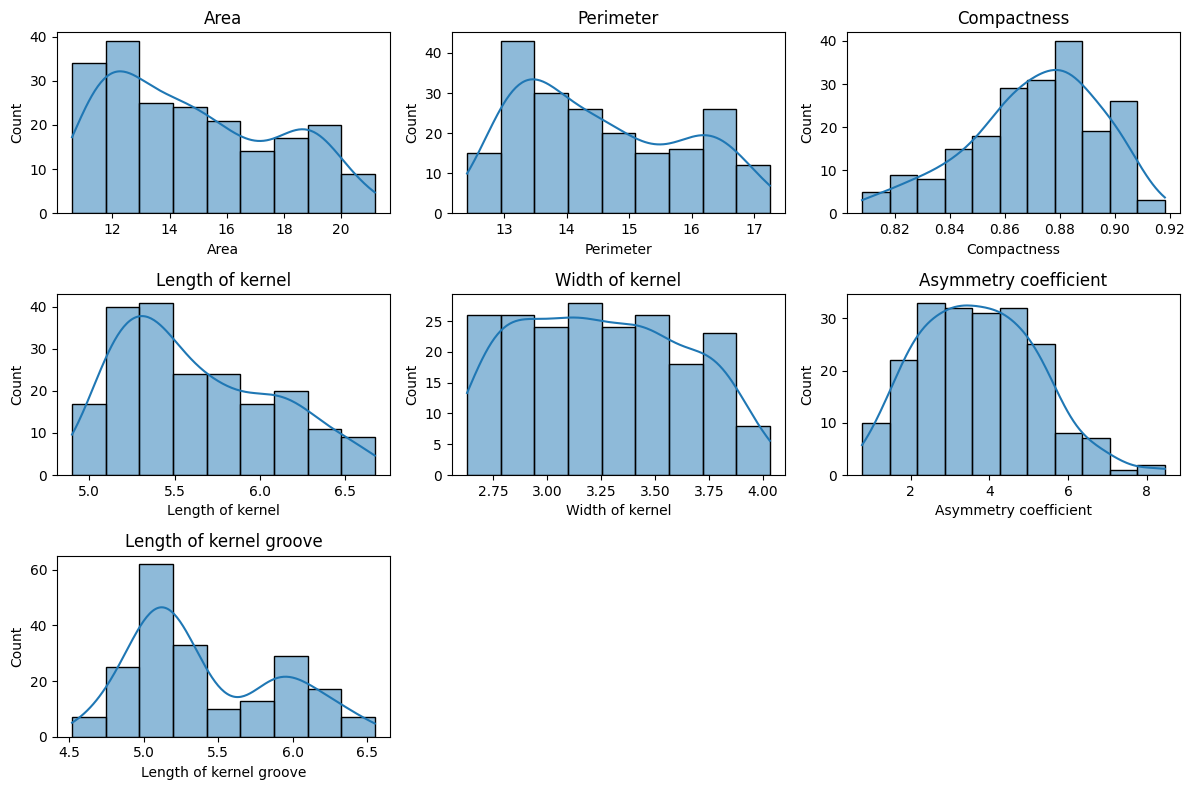

In [9]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(var_seeds_df.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(var_seeds_df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [10]:
var_X = var_seeds_df.copy()
scaler = StandardScaler()
var_X_scaled = scaler.fit_transform(var_X)

In [12]:
inertia = []
silhouette_scores = []
range_values = range(2, 10)
for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(var_X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(var_X_scaled, kmeans.labels_))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

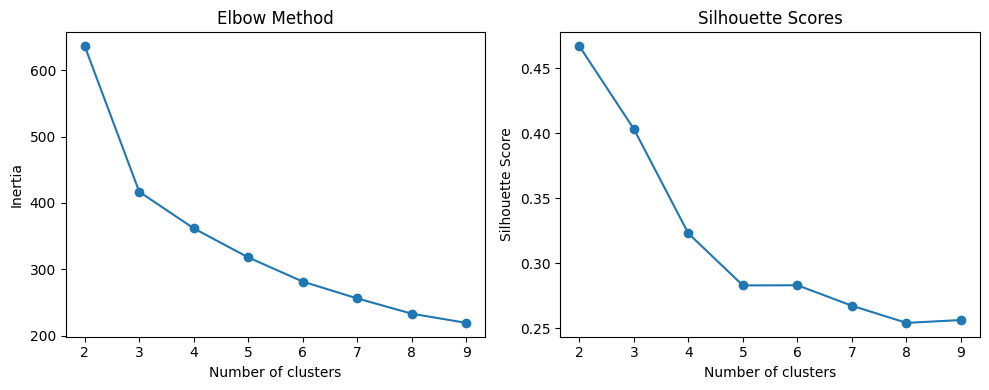

In [13]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.subplot(1, 2, 2)
plt.plot(range_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

In [19]:
optimal_clusters = 3
kmeans_final = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_final.fit(var_X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [20]:
var_seeds_df['Cluster'] = kmeans_final.labels_

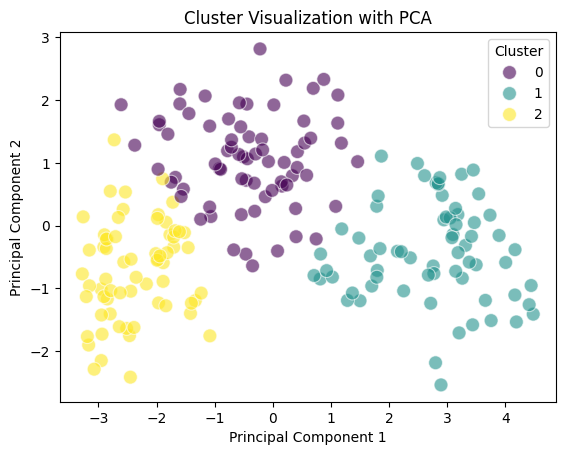

In [21]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(var_X_scaled)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_final.labels_, palette='viridis', s=100, alpha=0.6)
plt.title('Cluster Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()